# Connect to Google Drive


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
%cd "/content/drive/MyDrive/NLP-DS/NER_Cau2"

/content/drive/MyDrive/NLP-DS/NER_Cau2


# Get data from GitHub by Git Clone

In [19]:
#! git clone https://github.com/VinAIResearch/PhoNER_COVID19.git

# Import Modules

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from io import BytesIO
import pandas as pd
import numpy as np
import requests
np.random.seed(0)
plt.style.use("ggplot")
import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.5.0
GPU detected: []


# Load data



In [21]:
sentences_train = []
with open('PhoNER_COVID19/data/word/train_word.conll') as f:
  sentence = []
  for i, line in enumerate(f.readlines()):
    try:
      word, tag = line.split()
      sentence.append((word,tag))
    except:
      sentences_train.append(sentence)
      sentence = []

In [22]:
sentences_dev = []
with open('PhoNER_COVID19/data/word/dev_word.conll') as f1:
  sentence = []
  for i, line in enumerate(f1.readlines()):
    try:
      word, tag = line.split()
      sentence.append((word,tag))
    except:
      sentences_dev.append(sentence)
      sentence = []

In [23]:
sentences_test = []
with open('PhoNER_COVID19/data/word/test_word.conll') as f2:
  sentence = []
  for i, line in enumerate(f2.readlines()):
    try:
      word, tag = line.split()
      sentence.append((word,tag))
    except:
      sentences_test.append(sentence)
      sentence = []

In [24]:
print(len(sentences_train))
print(len(sentences_dev))
print(len(sentences_test))

5027
2000
3001


In [25]:
words = []
sentences_corpus=[sentences_train,sentences_dev,sentences_test]
for i in sentences_corpus:
    words += [word[0] for sent in i for word in sent]
words = list(set(words))
words.append("ENDPAD")
num_words = len(words)

In [26]:
print(words)
print(num_words)

['phản_ứng', 'buốt', 'vui', 'tuân_thủ', 'Bình_Lục', 'mắc_dịch', 'kháng_sinh', 'Tâm_lý_chiến', 'Chẳng', 'tàu_thuỷ', 'động', 'Frieman', 'Yên_Thế', 'bar', '3/10', 'Đ.T', '858', '614', 'Nội_Thận', 'tinh_tế', 'Thắng_Lợi', 'N.Q.T', '21D', 'mãn_tính', '296', 'chúng_ta', '95', 'Thanh_Miện', 'lây_nhiễm', 'đầu_tư', 'ttiếp', 'May_mắn', 'T.Đ.C.', 'toàn_diện', '1070', 'sống_sót', '8/6', 'Kha', 'Võ_Văn_Bản', 'chảy_máu', 'Ả_Rập_Xê_Út', 'Lương_Viết_Thuần', 'T.V.H.', '266', '800', '433', ')', 'Đã', 'nguy_cơ', '29/9', 'nuôi', 'Ít', 'điều', '834', 'Belarus', 'Thạch_Đài', 'bộ_đồ', 'mức_độ', 'khám_chữa', 'vú', 'khám_nghiệm', 'N.H.L.', 'Lê_Lợi', 'Bến_xe', 'phòng_khám', 'gian', 'Tân', 'trật_tự', 'nông_dân', 'tình_nguyện', 'Tr.A.T.', 'biện', 'thuốc_bổ', 'ghe', 'biên_giới', 'vi_trùng', 'chuẩn_bị', 'sở_hữu', 'Cơ', 'bế_giảng', 'một_mình', 'Theo', 'Palace', 'Khoa_Tim', 'Istanbul', '231', 'Thành', 'Tổng_công_ty', 'thuyền', 'Cầu_Treo', '965', 'đặc_trưng', 'chút', 'đối_diện', 'NV', 'Phú_Quốc', 'Bắc_Kạn', 'cao_răng'

In [27]:
tags = []
for i in sentences_corpus:
    for sent in i:
        for tag in sent:
            tags.append(tag[1])
tags = list(set(tags))
num_tags = len(tags)

In [28]:
print(tags)
print(num_tags)

['I-LOCATION', 'B-AGE', 'B-SYMPTOM_AND_DISEASE', 'I-PATIENT_ID', 'I-AGE', 'B-GENDER', 'B-LOCATION', 'I-JOB', 'B-ORGANIZATION', 'I-NAME', 'B-NAME', 'O', 'I-TRANSPORTATION', 'I-ORGANIZATION', 'B-DATE', 'B-JOB', 'B-TRANSPORTATION', 'B-PATIENT_ID', 'I-DATE', 'I-SYMPTOM_AND_DISEASE', 'O-ORGANIZATION']
21


In [29]:
print(num_words, num_tags)

8102 21


# Encoding sentences and index


In [30]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [31]:
tag2idx

{'B-AGE': 1,
 'B-DATE': 14,
 'B-GENDER': 5,
 'B-JOB': 15,
 'B-LOCATION': 6,
 'B-NAME': 10,
 'B-ORGANIZATION': 8,
 'B-PATIENT_ID': 17,
 'B-SYMPTOM_AND_DISEASE': 2,
 'B-TRANSPORTATION': 16,
 'I-AGE': 4,
 'I-DATE': 18,
 'I-JOB': 7,
 'I-LOCATION': 0,
 'I-NAME': 9,
 'I-ORGANIZATION': 13,
 'I-PATIENT_ID': 3,
 'I-SYMPTOM_AND_DISEASE': 19,
 'I-TRANSPORTATION': 12,
 'O': 11,
 'O-ORGANIZATION': 20}

In [32]:
word2idx

{'phản_ứng': 1,
 'buốt': 2,
 'vui': 3,
 'tuân_thủ': 4,
 'Bình_Lục': 5,
 'mắc_dịch': 6,
 'kháng_sinh': 7,
 'Tâm_lý_chiến': 8,
 'Chẳng': 9,
 'tàu_thuỷ': 10,
 'động': 11,
 'Frieman': 12,
 'Yên_Thế': 13,
 'bar': 14,
 '3/10': 15,
 'Đ.T': 16,
 '858': 17,
 '614': 18,
 'Nội_Thận': 19,
 'tinh_tế': 20,
 'Thắng_Lợi': 21,
 'N.Q.T': 22,
 '21D': 23,
 'mãn_tính': 24,
 '296': 25,
 'chúng_ta': 26,
 '95': 27,
 'Thanh_Miện': 28,
 'lây_nhiễm': 29,
 'đầu_tư': 30,
 'ttiếp': 31,
 'May_mắn': 32,
 'T.Đ.C.': 33,
 'toàn_diện': 34,
 '1070': 35,
 'sống_sót': 36,
 '8/6': 37,
 'Kha': 38,
 'Võ_Văn_Bản': 39,
 'chảy_máu': 40,
 'Ả_Rập_Xê_Út': 41,
 'Lương_Viết_Thuần': 42,
 'T.V.H.': 43,
 '266': 44,
 '800': 45,
 '433': 46,
 ')': 47,
 'Đã': 48,
 'nguy_cơ': 49,
 '29/9': 50,
 'nuôi': 51,
 'Ít': 52,
 'điều': 53,
 '834': 54,
 'Belarus': 55,
 'Thạch_Đài': 56,
 'bộ_đồ': 57,
 'mức_độ': 58,
 'khám_chữa': 59,
 'vú': 60,
 'khám_nghiệm': 61,
 'N.H.L.': 62,
 'Lê_Lợi': 63,
 'Bến_xe': 64,
 'phòng_khám': 65,
 'gian': 66,
 'Tân': 67,
 't

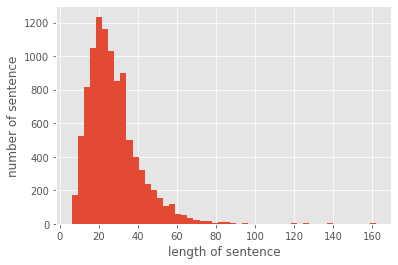

In [33]:
plt.hist([len(s) for s in sentences_train+sentences_dev+sentences_test], bins=50)
plt.xlabel("length of sentence")
plt.ylabel('number of sentence')
plt.show()

In [34]:
num_words-1

8101

In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 95
X_train = [[word2idx[w[0]] for w in s] for s in sentences_train]
X_train = pad_sequences(maxlen=max_len, sequences=X_train, padding="post", value=num_words-1)
X_dev = [[word2idx[w[0]] for w in s] for s in sentences_dev]
X_dev = pad_sequences(maxlen=max_len, sequences=X_dev, padding="post", value=num_words-1)
X_test = [[word2idx[w[0]] for w in s] for s in sentences_test]
X_test = pad_sequences(maxlen=max_len, sequences=X_test, padding="post", value=num_words-1)

y_train = [[tag2idx[w[1]] for w in s] for s in sentences_train]
y_train = pad_sequences(maxlen=max_len, sequences=y_train, padding="post", value=tag2idx["O"])
y_dev = [[tag2idx[w[1]] for w in s] for s in sentences_dev]
y_dev = pad_sequences(maxlen=max_len, sequences=y_dev, padding="post", value=tag2idx["O"])
y_test = [[tag2idx[w[1]] for w in s] for s in sentences_test]
y_test = pad_sequences(maxlen=max_len, sequences=y_test, padding="post", value=tag2idx["O"])

In [36]:
print(X_train[0])
print(y_train[0])

[1442 7406 4985 4248  480 1397 2021 1678 3533 6855 5885 3704 1004 2588
 6484  585 6956 3485 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101
 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101
 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101
 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101
 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101
 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101]
[11 11 11 11 11 11 11 11 11 11 11 11 11 11 11  8 13 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11]


In [37]:
np.save("X_train.npy",np.asarray(X_train))
np.save("y_train.npy",np.asarray(y_train))
np.save("X_test.npy",np.asarray(X_test))
np.save("y_test.npy",np.asarray(y_test))
np.save("X_dev.npy",np.asarray(X_dev))
np.save("y_dev.npy",np.asarray(y_dev))

# Bulding bi-LSTM


In [38]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [39]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=70, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 95)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 95, 70)            567140    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 95, 70)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 95, 200)           136800    
_________________________________________________________________
time_distributed (TimeDistri (None, 95, 21)            4221      
Total params: 708,161
Trainable params: 708,161
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

In [41]:
import time
start_time = time.time()

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_dev,y_dev),
    validation_split= 0.1,
    batch_size= 128, 
    epochs=20,
    verbose=1
)
print("[{}] Completed!".format(time.time() - start_time))

Epoch 1/20
36/36 [==============================] - 26s 616ms/step - loss: 1.0394 - acc: 0.9132 - val_loss: 0.3181 - val_acc: 0.9450
Epoch 2/20
36/36 [==============================] - 22s 606ms/step - loss: 0.3064 - acc: 0.9416 - val_loss: 0.2646 - val_acc: 0.9450
Epoch 3/20
36/36 [==============================] - 22s 614ms/step - loss: 0.2683 - acc: 0.9416 - val_loss: 0.2438 - val_acc: 0.9450
Epoch 4/20
36/36 [==============================] - 22s 610ms/step - loss: 0.2417 - acc: 0.9416 - val_loss: 0.2132 - val_acc: 0.9450
Epoch 5/20
36/36 [==============================] - 22s 602ms/step - loss: 0.2045 - acc: 0.9438 - val_loss: 0.1778 - val_acc: 0.9510
Epoch 6/20
36/36 [==============================] - 22s 607ms/step - loss: 0.1715 - acc: 0.9518 - val_loss: 0.1540 - val_acc: 0.9557
Epoch 7/20
36/36 [==============================] - 22s 605ms/step - loss: 0.1484 - acc: 0.9556 - val_loss: 0.1365 - val_acc: 0.9591
Epoch 8/20
36/36 [==============================] - 22s 607ms/step - 

# Evaluating



In [42]:
score_test = model.evaluate(X_test, y_test, batch_size = 128, verbose = 1)
 
print('\nTest categorical_crossentropy:', score_test[0])
print('Categorical accuracy:', score_test[1])

24/24 [==============================] - 3s 106ms/step - loss: 0.0844 - acc: 0.9813

Test categorical_crossentropy: 0.08437708020210266
Categorical accuracy: 0.981332540512085


In [43]:
score_dev = model.evaluate(X_dev, y_dev, batch_size = 128, verbose = 1)
 
print('\nTest categorical_crossentropy:', score_dev[0])
print('Categorical accuracy:', score_dev[1])

16/16 [==============================] - 2s 108ms/step - loss: 0.0744 - acc: 0.9829

Test categorical_crossentropy: 0.07440001517534256
Categorical accuracy: 0.9828789234161377


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


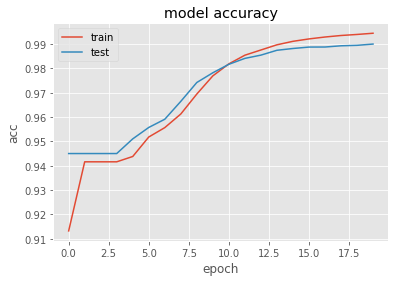

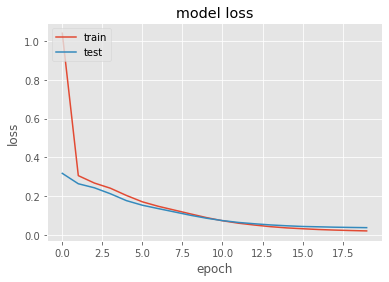

In [58]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("model_acc_T2.png")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("model_loss_T2.png")
plt.show()

# Save model

In [45]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Predicting

In [46]:
i = np.random.randint(0, X_test.shape[0]) #659
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(X_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Word           True 	 Pred

------------------------------
Đến            O	O
đêm            O	O
23             B-DATE	B-DATE
-              I-DATE	I-DATE
3              I-DATE	I-DATE
,              O	O
sau            O	O
khi            O	O
có             O	O
kết_quả        O	O
xét_nghiệm     O	O
bệnh_nhân      O	O
122            B-PATIENT_ID	B-PATIENT_ID
dương_tính     O	O
với            O	O
SARS           O	O
-              O	O
CoV            O	O
-              O	O
2              O	O
,              O	O
bệnh_nhân      O	O
146            B-PATIENT_ID	B-PATIENT_ID
cùng           O	O
14             O	O
người          O	O
tiếp_xúc       O	O
gần            O	O
đã             O	O
được           O	O
đưa            O	O
đến            O	O
cách_ly        O	O
y_tế           O	O
tại            O	O
Bệnh_viện      B-LOCATION	B-LOCATION
Đa_khoa        I-LOCATION	I-LOCATION
khu_vực        I-LOCATION	I-LOCATION
cửa_khẩu       I-LOCATION	I-LOCATION
quốc_tế        I-LOCATION	I-LOCATION
Cầu_Treo       I-

In [47]:
predict_test = model.predict(np.array(X_test))
predict_test = np.argmax(predict_test, axis=-1)
print(predict_test[0])

[11 14 18 18 11 14 18 18 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11  6
  0 11 11 11 11 11 11 11 11 11 11 11 11 11  6  0 11  6 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11]


In [48]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
predict_test = np.reshape(predict_test, len(predict_test)*max_len)
y_test_ = np.reshape(y_test, len(y_test)*max_len)
print("Accuracy Score:", accuracy_score(y_test_, predict_test))

Accuracy Score: 0.9813325382767147


# Thêm đánh giá F1 score: Macro, Micro, Weighted

In [49]:
print('F1-score macro: ',f1_score(y_test_, predict_test,average='macro'))
print('F1-score macro: ',f1_score(y_test_, predict_test,average='micro'))
print('F1-score macro: ',f1_score(y_test_, predict_test,average='weighted'))

F1-score macro:  0.5918257502613299
F1-score macro:  0.9813325382767147
F1-score macro:  0.9798613767281258


# Result of  F1-score and Accuracy for specific label in Test set

In [50]:
tags_test = []
for i in sentences_test:
    for sent in i:
            tags_test.append(sent[1])
tags_test = list(set(tags_test))
for i in tag2idx.keys():
    if(i not in tags_test):
        tag_not_in_test=i
        print(i) 

O-ORGANIZATION


In [51]:
for i in range(len(tag2idx.values())):
    if(list(tag2idx.keys())[i]==tag_not_in_test):
        index_tag_not_in_test=i

In [55]:
index_tag_not_in_test
#tag_not_in_test

20

In [53]:
target_names = list(tag2idx.keys())[0:index_tag_not_in_test]+list(tag2idx.keys())[index_tag_not_in_test+1:21]
print(classification_report(y_test_, predict_test, target_names=target_names, digits=4))

                       precision    recall  f1-score   support

           I-LOCATION     0.9126    0.7688    0.8346      4905
                B-AGE     0.8435    0.7714    0.8058       573
B-SYMPTOM_AND_DISEASE     0.8925    0.7817    0.8334      1136
         I-PATIENT_ID     0.0000    0.0000    0.0000        27
                I-AGE     0.0000    0.0000    0.0000         6
             B-GENDER     0.9130    0.8827    0.8976       452
           B-LOCATION     0.8982    0.8597    0.8785      4432
                I-JOB     0.0000    0.0000    0.0000       114
       B-ORGANIZATION     0.8411    0.7691    0.8035       771
               I-NAME     0.0000    0.0000    0.0000        13
               B-NAME     0.7966    0.2956    0.4312       318
                    O     0.9868    0.9970    0.9919    263037
     I-TRANSPORTATION     0.9231    0.1739    0.2927        69
       I-ORGANIZATION     0.8621    0.7701    0.8135      2014
               B-DATE     0.9685    0.9503    0.9593  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
target_names

['I-LOCATION',
 'B-AGE',
 'B-SYMPTOM_AND_DISEASE',
 'I-PATIENT_ID',
 'I-AGE',
 'B-GENDER',
 'B-LOCATION',
 'I-JOB',
 'B-ORGANIZATION',
 'I-NAME',
 'B-NAME',
 'O',
 'I-TRANSPORTATION',
 'I-ORGANIZATION',
 'B-DATE',
 'B-JOB',
 'B-TRANSPORTATION',
 'B-PATIENT_ID',
 'I-DATE',
 'I-SYMPTOM_AND_DISEASE']

In [57]:
import json
with open("word2idx.json", "w",encoding="utf8") as f:
    json.dump(word2idx,f)
with open("tag2idx.json", "w",encoding="utf8") as f:
    json.dump(tag2idx,f)